# ALTERNATIVE APPROACH 1: STRONG RADIAL DEFORMATION

This code serves as an example for how to implement the robust 2D multivariate Gaussian fit for strongly radially deformed spots as explained in the scientific publication.

meanx (2D gaussian fit in cylindric coordinates) = 0.78138 +/- 0.00261
meany (2D gaussian fit in cylindric coordinates) = 9.98856 +/- 0.01018
sigx (2D gaussian fit in cylindric coordinates) = 0.26142 +/- 0.00185
sigy (2D gaussian fit in cylindric coordinates) = 1.01754 +/- 0.00720
theta (2D gaussian fit in cylindric coordinates) = -0.00068 +/- 0.00275
meanx (2D gaussian fit in cylindric coordinates) = 6.85281 +/- 0.01939
meany (2D gaussian fit in cylindric coordinates) = 6.79969 +/- 0.01963
sigx (2D gaussian fit in cylindric coordinates) = 3.75794 +/- 0.05315
sigy (2D gaussian fit in cylindric coordinates) = 3.85230 +/- 0.05448


'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


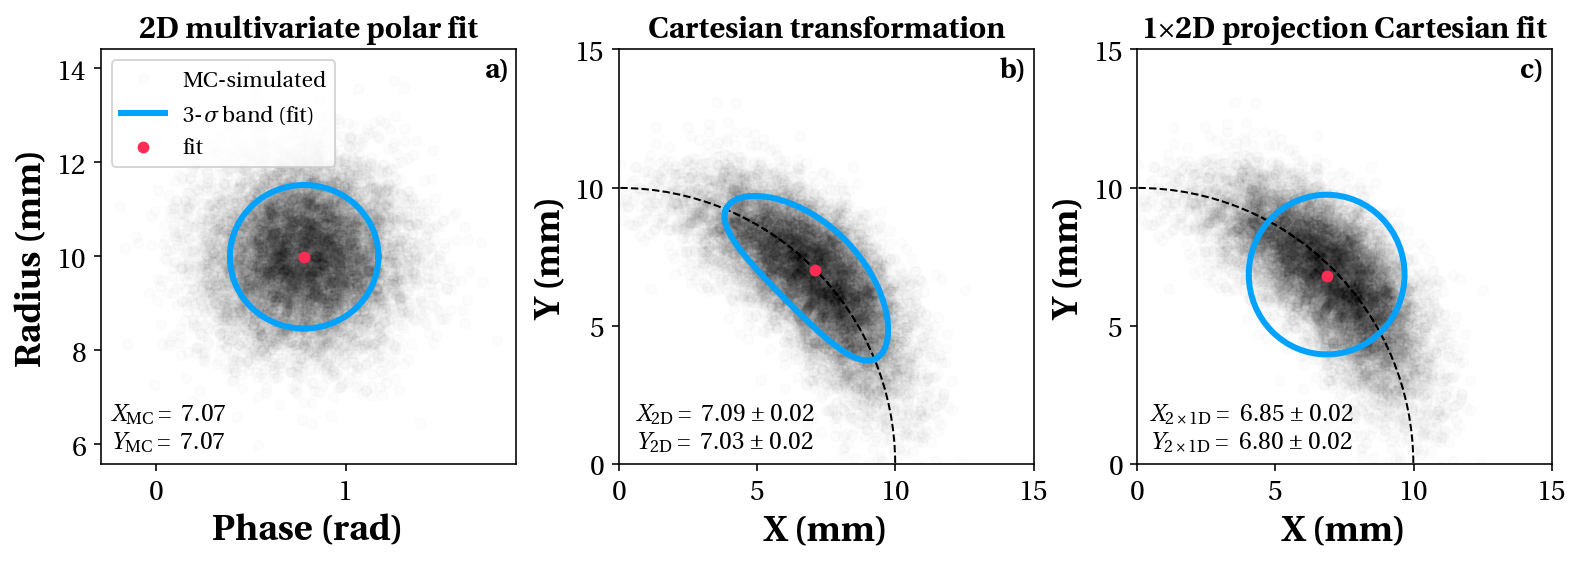

In [21]:
col = ['#FFCC00', '#FF2D55', '#00A2FF', '#61D935', 'k', 'grey', 'pink'] # yellow, red, blue, green

# Generate 2D Gaussian in cylindric coordiantes instead cartesian -> spot follows circular distribution
df2 = pd.DataFrame({'phi': np.random.normal(np.radians(45), np.radians(15), 10000),
                    'rho': np.random.normal(10, 1, 10000)})

# Convert data to cartesian coordinates for comparison display
df2['x'] = df2.rho * np.cos(df2.phi)
df2['y'] = df2.rho * np.sin(df2.phi)

# Plot generated data
f2, (ax2_cyl, ax2_car, ax2_2D) = plt.subplots(1,3,figsize=(13,6),gridspec_kw={'wspace': 0.25})

df2.plot(x='phi', y='rho', ax=ax2_cyl, marker='o', color='k', lw=0, ms=5, alpha=0.01, label='MC-simulated', zorder=1)
df2.plot(x='x', y='y', ax=ax2_car, marker='o', color='k', lw=0, ms=5, alpha=0.01, label='MC-simulated', zorder=1)
df2.plot(x='x', y='y', ax=ax2_2D, marker='o', color='k', lw=0, ms=5, alpha=0.01, label='MC-simulated', zorder=1)

# Fit 2D MLE to cylindric data instead cartesian data
data_phi2 = df.phase_sym.to_numpy()

# minimize negative log likelihood function then for the asymmetric case
data = df2[['phi', 'rho']].to_numpy()
test = Minuit(NLL_2D, meanx=Start_Par(data)[0], meany=Start_Par(data)[1],
                     sigx=Start_Par(data)[2], sigy=Start_Par(data)[3],
                     theta=Start_Par(data)[4])
test.errors = (0.1, 0.1, 0.1, 0.1, 0.1) # initital step size
test.limits =[(None, None), (None, None), (None, None), (None, None), (None, None)] # fit ranges
test.errordef = Minuit.LIKELIHOOD # MLE definition (instead of Minuit.LEAST_SQUARES)
test.migrad() # finds minimum of mle function
test.hesse()  # computes errors

def NLL_1x2D(meanx, meany, sigx, sigy):
    '''Negative log likelihood function for (n=1)-dimensional Gaussian distribution.'''
    return( -np.sum(multivariate_normal.logpdf(x=data_1x2D,
                                               mean=np.array([meanx, meany]),
                                               cov=np.array([[sigx, 0],[0,sigy]]),
                                               allow_singular=True)) )

def Start_Par_1x2D(data):
    '''Starting parameter based on simple mean of 1D numpy array.'''
    return(np.array([data[:,0].mean(), data[:,1].mean(),  # mean
                     data[:,0].std(), data[:,1].std()])) #rho

# minimize negative log likelihood function first for the symmetric case
data_1x2D = df2[['x', 'y']].to_numpy()

test2 = Minuit(NLL_1x2D, meanx=Start_Par_1x2D(data_1x2D)[0], meany=Start_Par_1x2D(data_1x2D)[1], sigx=Start_Par_1x2D(data_1x2D)[2], sigy=Start_Par_1x2D(data_1x2D)[3])
test2.errors = (0.1, 0.1, 0.1, 0.1) # initital step size
test2.limits =[(None, None), (None, None), (None, None), (None, None)] # fit ranges
test2.errordef = Minuit.LIKELIHOOD # MLE definition (instead of Minuit.LEAST_SQUARES)
test2.migrad() # finds minimum of mle function
test2.hesse()  # computes errors

# print out results
for p in test.parameters:
    print('{} (2D gaussian fit in cylindric coordinates) = {:3.5f} +/- {:3.5f}'.format(p, test.values[p], test.errors[p]))
# print out results
for p in test2.parameters:
    print('{} (2D gaussian fit in cylindric coordinates) = {:3.5f} +/- {:3.5f}'.format(p, test2.values[p], test2.errors[p]))

    
# plot cylindric-coordinate fit results with +/-3 sigma ellipse -> parametric equation of a rotated ellipse
# 𝑥(𝛼)=𝑅𝑥cos(𝛼)cos(𝜃)−𝑅𝑦sin(𝛼)sin(𝜃)+𝐶𝑥
# 𝑦(𝛼)=𝑅𝑥cos(𝛼)sin(𝜃)+𝑅𝑦sin(𝛼)cos(𝜃)+𝐶𝑦
# - 𝐶𝑥 is center X.
# - 𝐶𝑦 is center Y.
# - 𝑅𝑥 is the major radius.
# - 𝑅𝑦 is the minor radius.
# - 𝛼 is the parameter, which ranges from 0 to 2π radians.
# - 𝜃 is the Ellipse rotation angle.
𝛼 = np.linspace(0, 2*np.pi, 1000)
phi_fit = 1.5*test.values['sigx'] * np.cos(𝛼) * np.cos(test.values['theta']) - 1.5*test.values['sigy'] * np.sin(𝛼) * np.sin(test.values['theta']) + test.values['meanx']
rho_fit = 1.5*test.values['sigx'] * np.cos(𝛼) * np.sin(test.values['theta']) + 1.5*test.values['sigy'] * np.sin(𝛼) * np.cos(test.values['theta']) + test.values['meany']

# converting fit ellipse from cylindric coordinates into cartesian coordinates for comparison display
df_fit = pd.DataFrame({'phi_fit': phi_fit, 'rho_fit': rho_fit})
df_fit['x_fit'] = df_fit.rho_fit * np.cos(df_fit.phi_fit)
df_fit['y_fit'] = df_fit.rho_fit * np.sin(df_fit.phi_fit)

# plot fit -> shape looks funny :D
df_fit.plot(x='x_fit', y='y_fit', ax=ax2_car, c=col[2], lw=3, zorder=2, label='3-$\sigma$ band (fit)')
df_fit.plot(x='phi_fit', y='rho_fit', ax=ax2_cyl, c=col[2], lw=3, zorder=2, label='3-$\sigma$ band (fit)')

ax2_car.scatter(test.values['meany'] * np.cos(test.values['meanx']), test.values['meany'] * np.sin(test.values['meanx']), marker='o', color=col[1], linewidth=0, zorder=2, s=35, label='fit')
ax2_cyl.scatter(test.values['meanx'], test.values['meany'], marker='o', color=col[1], linewidth=0, zorder=2, s=35, label='fit')
ax2_2D.scatter(test2.values['meanx'], test2.values['meany'], marker='o', color=col[1], linewidth=0, zorder=2, s=35, label='fit')

# make sure the cartesian plot is symmetric
ax2_car.set_xlim(-17,17)
ax2_car.set_ylim(-17,17)

# draw circular motion for easy display; careful, since the fit results are in cylindric coordinates
ax2_car.add_patch(mpl.patches.Ellipse((0,0), 2*np.sqrt(test.values['meany']**2*np.cos(test.values['meanx'])**2+test.values['meany']**2*np.sin(test.values['meanx'])**2),
                                      2*np.sqrt(test.values['meany']**2*np.cos(test.values['meanx'])**2+test.values['meany']**2*np.sin(test.values['meanx'])**2),
                                      edgecolor='k', fc='None', lw=1, ls='--'))
ax2_2D.add_patch(mpl.patches.Ellipse((0,0), 2*np.sqrt(test.values['meany']**2*np.cos(test.values['meanx'])**2+test.values['meany']**2*np.sin(test.values['meanx'])**2),
                                      2*np.sqrt(test.values['meany']**2*np.cos(test.values['meanx'])**2+test.values['meany']**2*np.sin(test.values['meanx'])**2),
                                      edgecolor='k', fc='None', lw=1, ls='--'))
ax2_2D.add_patch(mpl.patches.Ellipse((test2.values['meanx'],test2.values['meanx']), 1.5*test2.values['sigx'], 1.5*test2.values['sigy'], edgecolor=col[2], fc='None', lw=3, zorder=2, label='3-$\sigma$ band (fit)'))


ax2_cyl.set_xlabel('Phase (rad)',fontsize=18,fontweight='bold')
ax2_cyl.set_ylabel('Radius (mm)',fontsize=18,fontweight='bold')
ax2_car.set_xlabel('X (mm)',fontsize=18,fontweight='bold')
ax2_car.set_ylabel('Y (mm)',fontsize=18,fontweight='bold')
ax2_2D.set_xlabel('X (mm)',fontsize=18,fontweight='bold')
ax2_2D.set_ylabel('Y (mm)',fontsize=18,fontweight='bold')
ax2_car.set_title('Cartesian transformation',fontsize=15,fontweight='bold')
ax2_cyl.set_title('2D multivariate polar fit',fontsize=15,fontweight='bold')
ax2_2D.set_title('1$\\times$2D projection Cartesian fit',fontsize=15,fontweight='bold')
ax2_car.set_aspect('equal', 'box')
ax2_cyl.set_aspect(1.0/ax2_cyl.get_data_ratio(), adjustable='box')
ax2_2D.set_aspect('equal', 'box')

ax2_car.set(xlim=(0,15),ylim=(0,15))
ax2_2D.set(xlim=(0,15),ylim=(0,15))

ax2_car.set_xticks([0,5,10,15])
ax2_car.set_yticks([0,5,10,15])
ax2_2D.set_xticks([0,5,10,15])
ax2_2D.set_yticks([0,5,10,15])

lg1 = ax2_cyl.legend(loc=2, fontsize=11)
ax2_2D.get_legend().remove()
ax2_car.get_legend().remove()

f2.text(0.13,0.28,'$X_{{\\rm{{MC}}}}=$ {:3.2f}\n$Y_{{\\rm{{MC}}}}=$ {:3.2f}'.format(7.07,7.07), fontsize=12)
f2.text(0.41,0.28,'$X_{{\\rm{{2D}}}}=$ {:3.2f} $\pm$ {:3.2f}\n$Y_{{\\rm{{2D}}}}=$ {:3.2f} $\pm$ {:3.2f}'.format(test.values['meany']*np.cos(test.values['meanx']),
                                                                                                                 np.sqrt((test.errors['meany']*np.cos(test.values['meanx']))**2+(test.errors['meanx']*test.values['meany']*np.sin(test.values['meanx']))**2),
                                                                                                                 test.values['meany']*np.sin(test.values['meanx']),
                                                                                                                 np.sqrt((test.errors['meany']*np.sin(test.values['meanx']))**2+(test.errors['meanx']*test.values['meany']*np.cos(test.values['meanx']))**2)), fontsize=12)
f2.text(0.685,0.28,'$X_{{\\rm{{2\\times1D}}}}=$ {:3.2f} $\pm$ {:3.2f}\n$Y_{{\\rm{{2\\times1D}}}}=$ {:3.2f} $\pm$ {:3.2f}'.format(test2.values['meanx'],test2.errors['meanx'],test2.values['meany'],test2.errors['meany']), fontsize=12)
f2.text(0.33,0.71,'a)', fontsize=14,fontweight='bold')
f2.text(0.605,0.71,'b)', fontsize=14,fontweight='bold')
f2.text(0.883,0.71,'c)', fontsize=14,fontweight='bold')


ax2_cyl.tick_params(labelsize=14)
ax2_car.tick_params(labelsize=14)
ax2_2D.tick_params(labelsize=14)
plt.savefig('PI-ICR-cylindric-data-generation-and-fit.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

# ALTERNATIVE APPROACH 2: VERY HIGH-PRECISION

This part of the MC simulation covers the alternative approach 2 of the scientific publication, in which the (x, y) data is transformed into polar coordinate (r, phi). Since only the phase information is relevant for PI-ICR, the radial information is ignored for the fit and only the phase projection of the data is fitted with a 1D Gaussian function using the maximum likelihood estimation based on the unbinned data.

In [1]:
# high-resolution display output
%config InlineBackend.figure_format ='retina'

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from iminuit import Minuit


# Utopia LaTeX font with greek letters
mpl.rc('font', family='serif', serif='Linguistics Pro')
mpl.rc('text', usetex=False)
mpl.rc('mathtext', fontset='custom',
       rm='Linguistics Pro',
       it='Linguistics Pro:italic',
       bf='Linguistics Pro:bold')

# Random data generation

In order to create a realistic asymmetric peak with maximal deviation between the two methods, a 45 degree rotation is applied to the asymmetric peak. This is performed by creating an asymmetric peak at the origin, rotating it via a simple rotation matrix and then shifting it to the same spot as the symmetric peak.

In [26]:
x0 = 9.9
y0 = 9.9   # spot displacement
theta = np.arctan2(y0,x0)
print('Rotation angle:', np.degrees(theta))

x_c = y_c = 0  # center coordinates
sig = 1        # distribution sigma
n_data = 1000 # number of random data points

# generating data
df = pd.DataFrame({'x_sym': np.random.normal(x0, sig, n_data),
                   'y_sym': np.random.normal(y0, sig, n_data),
                   'x_asym':np.random.normal(0, sig, n_data),
                   'y_asym':np.random.normal(0, 2*sig, n_data)})

# apply rotation of angle theta to cartesian coordinates
def rot(theta):
    return np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta), np.cos(theta)]])

# rotating asymmetric peak by theta deg
df['x_asym_rot'] = df.x_asym * rot(theta)[0][0] + df.y_asym * rot(theta)[0][1]
df['y_asym_rot'] = df.x_asym * rot(theta)[1][0] + df.y_asym * rot(theta)[1][1]

# shifting asymmetric peak to x = y = 10
df.x_asym += x0
df.y_asym += y0
df.x_asym_rot += x0
df.y_asym_rot += y0

# calculating the phases for the center spot at x_c = y_c = 0 for simplicity
df['phase_sym'] = np.arctan2(df.y_sym - y_c, df.x_sym - x_c)
df['phase_asym'] = np.arctan2(df.y_asym_rot - y_c, df.x_asym_rot - x_c)
df['phase_def'] = np.arctan2(df.y_asym - y_c, df.x_asym - x_c)

df.head()

Rotation angle: 45.0


,x_sym,y_sym,x_asym,y_asym,x_asym_rot,y_asym_rot,phase_sym,phase_asym,phase_def
0,11.059690,10.284064,10.449179,7.376879,12.072444,8.504212,0.749074,0.613694,0.614726
1,8.727979,10.319148,10.405340,11.634881,9.030584,11.484075,0.868743,0.904430,0.841127
2,10.848819,8.885719,9.309831,6.959909,11.561646,7.403729,0.686249,0.569576,0.641955
3,11.344931,9.563007,8.701448,11.696827,7.781947,10.323044,0.700376,0.924841,0.931201
4,9.940635,10.613491,10.055305,10.783434,9.385135,10.634500,0.818122,0.847724,0.820325


In [27]:
from scipy.stats import norm
import numpy as np
from iminuit import Minuit


def NLL_1D(mean, sig):
    '''Negative log likelihood function for (n=1)-dimensional Gaussian distribution.'''
    return( -np.sum(norm.logpdf(x=data_phi,
                    loc=mean,
                    scale=sig)) )

def Start_Par(data):
    '''Starting parameter based on simple mean of 1D numpy array.'''
    return(np.array([data.mean(),  # meanx
                     data.std()])) #rho

# minimize negative log likelihood function first for the symmetric case
data_phi = df.phase_sym.to_numpy()

results_phase_sym = Minuit(NLL_1D, mean=Start_Par(data_phi)[0], sig=Start_Par(data_phi)[1])
results_phase_sym.errors = (0.1, 0.1) # initital step size
results_phase_sym.limits =[(None, None), (None, None)] # fit ranges
results_phase_sym.errordef = Minuit.LIKELIHOOD # MLE definition (instead of Minuit.LEAST_SQUARES)
results_phase_sym.migrad() # finds minimum of mle function
results_phase_sym.hesse()  # computes errors


# minimize negative log likelihood function for the asymmetric case
data_phi = df.phase_asym.to_numpy()

results_phase_asym = Minuit(NLL_1D, mean=Start_Par(data_phi)[0], sig=Start_Par(data_phi)[1])
results_phase_asym.errors = (0.1, 0.1) # initital step size
results_phase_asym.limits =[(None, None), (None, None)] # fit ranges
results_phase_asym.errordef = Minuit.LIKELIHOOD # MLE definition (instead of Minuit.LEAST_SQUARES)
results_phase_asym.migrad() # finds minimum of mle function
results_phase_asym.hesse()  # computes errors


# minimize negative log likelihood function for the deformed case
data_phi = df.phase_def.to_numpy()

results_phase_def = Minuit(NLL_1D, mean=Start_Par(data_phi)[0], sig=Start_Par(data_phi)[1])
results_phase_def.errors = (0.1, 0.1) # initital step size
results_phase_def.limits =[(None, None), (None, None)] # fit ranges
results_phase_def.errordef = Minuit.LIKELIHOOD # MLE definition (instead of Minuit.LEAST_SQUARES)
results_phase_def.migrad() # finds minimum of mle function
results_phase_def.hesse()  # computes errors


# print out results
for p in results_phase_sym.parameters:
    print("{} (sym) = {:3.5f} +/- {:3.5f}".format(p, results_phase_sym.values[p], results_phase_sym.errors[p]))
for p in results_phase_asym.parameters:
    print("{} (asym) = {:3.5f} +/- {:3.5f}".format(p, results_phase_asym.values[p], results_phase_asym.errors[p]))
for p in results_phase_def.parameters:
    print("{} (def) = {:3.5f} +/- {:3.5f}".format(p, results_phase_def.values[p], results_phase_def.errors[p]))

mean (sym) = 0.78792 +/- 0.00226
sig (sym) = 0.07146 +/- 0.00160
mean (asym) = 0.77563 +/- 0.00462
sig (asym) = 0.14600 +/- 0.00326
mean (def) = 0.76907 +/- 0.00382
sig (def) = 0.12074 +/- 0.00270


# Robust fit: 2D multivariate Gaussian

For comparison in these MC simulation studies, the proposed robust fitting method (see scientific publication) using a multivariate 2D Gaussian model for the maximum likelihood estimation is used for comparison.

In [28]:
from scipy.stats import multivariate_normal, linregress, pearsonr
from scipy.optimize import minimize
import numpy as np
from iminuit import Minuit

def Rot(theta):
    '''Rotation (matrix) of angle theta to cartesian coordinates.'''
    return np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta), np.cos(theta)]])

def NLL_2D(meanx, meany, sigx, sigy, theta):
    '''Negative log likelihood function for (n=2)-dimensional Gaussian distribution for Minuit.'''
    cov = Rot(theta) @ np.array([[np.power(sigx,2),0],[0,np.power(sigy,2)]]) @ Rot(theta).T
    return( -np.sum(multivariate_normal.logpdf(x=data,
                                               mean=np.array([meanx, meany]),
                                               cov=cov,
                                               allow_singular=True)) )

def NLL_2D_scipy(param):
    '''Negative log likelihood function for (n=2)-dimensional Gaussian distribution for SciPy.'''
    meanx, meany, sigx, sigy, theta = param
    cov = Rot(theta) @ np.array([[np.power(sigx,2),0],[0,np.power(sigy,2)]]) @ Rot(theta).T
    return( -np.sum(multivariate_normal.logpdf(x=data,
                                               mean=np.array([meanx, meany]),
                                               cov=cov,
                                               allow_singular=True)) )

def Start_Par(data):
    '''Starting parameter based on simple linear regression and 2D numpy array.'''
    # simple linear regression to guess the rotation angle based on slope
    slope, intercept, r_value, p_value, std_err = linregress(data[:, 0], data[:, 1])
    theta_guess = -np.arctan(slope)

    # data rotated based on theta guess
    data_rotated_guess = np.dot(Rot(theta_guess), [data[:,0], data[:,1]])
    
    first_guess = np.array([data[:,0].mean()+0.2, # meanx
                            data[:,1].mean()+0.2, # meany
                            data_rotated_guess[1].std(), # sigma-x
                            data_rotated_guess[0].std(), # sigma-y
                            theta_guess])       # rot. angle based on slope of lin. reg.
    
    # based on a first guess, a minimization based on a robust simplex is performed
    start_par =  minimize(NLL_2D_scipy, first_guess, method='Nelder-Mead')
    return(start_par['x'])

# minimize negative log likelihood function first for the symmetric case
data = df[['x_sym', 'y_sym']].to_numpy()
results_sym = Minuit(NLL_2D, meanx=Start_Par(data)[0], meany=Start_Par(data)[1],
                     sigx=Start_Par(data)[2], sigy=Start_Par(data)[3],
                     theta=Start_Par(data)[4])
results_sym.errors = (0.1, 0.1, 0.1, 0.1, 0.1) # initital step size
results_sym.limits =[(None, None), (None, None), (None, None), (None, None), (None, None)] # fit ranges
results_sym.errordef = Minuit.LIKELIHOOD # MLE definition (instead of Minuit.LEAST_SQUARES)
results_sym.migrad() # finds minimum of mle function
results_sym.hesse()  # computes errors

# minimize negative log likelihood function then for the asymmetric case
data = df[['x_asym_rot', 'y_asym_rot']].to_numpy()
results_asym = Minuit(NLL_2D, meanx=Start_Par(data)[0], meany=Start_Par(data)[1],
                     sigx=Start_Par(data)[2], sigy=Start_Par(data)[3],
                     theta=Start_Par(data)[4])
results_asym.errors = (0.1, 0.1, 0.1, 0.1, 0.1) # initital step size
results_asym.limits =[(None, None), (None, None), (None, None), (None, None), (None, None)] # fit ranges
results_asym.errordef = Minuit.LIKELIHOOD # MLE definition (instead of Minuit.LEAST_SQUARES)
results_asym.migrad() # finds minimum of mle function
results_asym.hesse()  # computes errors

# minimize negative log likelihood function then for the deformed case
data = df[['x_asym', 'y_asym']].to_numpy()
results_def = Minuit(NLL_2D, meanx=Start_Par(data)[0], meany=Start_Par(data)[1],
                     sigx=Start_Par(data)[2], sigy=Start_Par(data)[3],
                     theta=Start_Par(data)[4])
results_def.errors = (0.1, 0.1, 0.1, 0.1, 0.1) # initital step size
results_def.limits =[(None, None), (None, None), (None, None), (None, None), (None, None)] # fit ranges
results_def.errordef = Minuit.LIKELIHOOD # MLE definition (instead of Minuit.LEAST_SQUARES)
results_def.migrad() # finds minimum of mle function
results_def.hesse()  # computes errors

# print out results
for p in results_sym.parameters:
    print('{} (sym) = {:3.5f} +/- {:3.5f}'.format(p, results_sym.values[p], results_sym.errors[p]))
for p in results_asym.parameters:
    print('{} (asym) = {:3.5f} +/- {:3.5f}'.format(p, results_asym.values[p], results_asym.errors[p]))
for p in results_def.parameters:
    print('{} (def) = {:3.5f} +/- {:3.5f}'.format(p, results_def.values[p], results_def.errors[p]))

# # calculate phase and uncertainty
# # calculate the uncertainty on the angle between the P1/P2 vectors
# # see https://en.wikipedia.org/wiki/Atan2

phase_sym = np.arctan2(results_sym.values['meany'], results_sym.values['meanx'])
phase_sym_unc = np.sqrt(((- results_sym.values['meany'] * np.sqrt(results_sym.errors['meanx']))**2 +
                        (results_sym.values['meanx'] * np.sqrt(results_sym.errors['meany']))**2 ) /
                         (results_sym.values['meanx']**2 + results_sym.values['meany']**2)**2 )                  
print('\nCalculated sym phase from X/Y-fit: {:3.5f} +/- {:3.5f}'.format(phase_sym, phase_sym_unc))

phase_asym = np.arctan2(results_asym.values['meany'], results_asym.values['meanx'])
phase_asym_unc = np.sqrt(((- results_asym.values['meany'] * np.sqrt(results_asym.errors['meanx']))**2 +
                          (results_asym.values['meanx'] * np.sqrt(results_asym.errors['meany']))**2 ) /
                         (results_asym.values['meanx']**2 + results_asym.values['meany']**2)**2 )
print('Calculated asym phase from X/Y-fit: {:3.5f} +/- {:3.5f}'.format(phase_asym, phase_asym_unc))

phase_def = np.arctan2(results_def.values['meany'], results_def.values['meanx'])
phase_def_unc = np.sqrt(((- results_def.values['meany'] * np.sqrt(results_def.errors['meanx']))**2 +
                          (results_def.values['meanx'] * np.sqrt(results_def.errors['meany']))**2 ) /
                         (results_def.values['meanx']**2 + results_def.values['meany']**2)**2 )
print('Calculated def phase from X/Y-fit: {:3.5f} +/- {:3.5f}'.format(phase_def, phase_def_unc))

meanx (sym) = 9.85431 +/- 0.03262
meany (sym) = 9.89743 +/- 0.03046
sigx (sym) = 1.03151 +/- 0.02306
sigy (sym) = 0.96317 +/- 0.02154
theta (sym) = 0.01858 +/- 0.23039
meanx (asym) = 10.00964 +/- 0.05194
meany (asym) = 9.81013 +/- 0.05128
sigx (asym) = 1.00652 +/- 0.02251
sigy (asym) = 2.07698 +/- 0.04644
theta (asym) = 0.79576 +/- 0.02003
meanx (def) = 9.91399 +/- 0.03183
meany (def) = 9.75896 +/- 0.06568
sigx (def) = 1.00652 +/- 0.02251
sigy (def) = 2.07698 +/- 0.04644
theta (def) = 0.01036 +/- 0.02003

Calculated sym phase from X/Y-fit: 0.78758 +/- 0.01272
Calculated asym phase from X/Y-fit: 0.77533 +/- 0.01621
Calculated def phase from X/Y-fit: 0.77752 +/- 0.01592


# Comparison plot

The results of a single MC simulation is compared in a plot.

/Users/jonaskarthein/miniforge3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:613: UserWarning: The handle <matplotlib.lines.Line2D object at 0x118caeb20> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/Users/jonaskarthein/miniforge3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:613: UserWarning: The handle <matplotlib.lines.Line2D object at 0x11d94a850> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


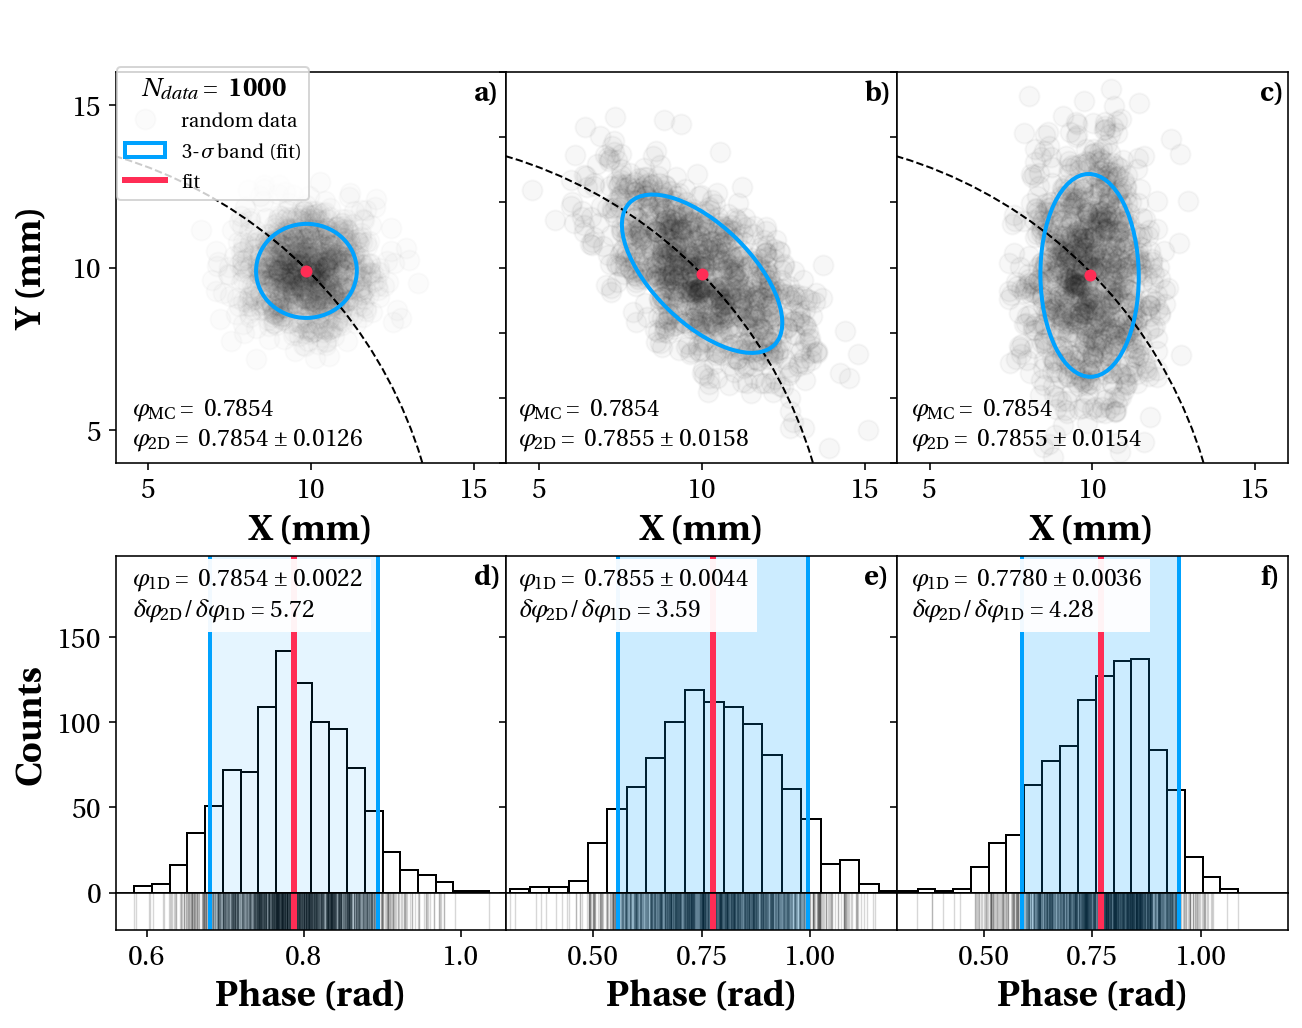

In [43]:
# plotting
col = ['#FFCC00', '#FF2D55', '#00A2FF', '#61D935', 'k', 'grey', 'pink'] # yellow, red, blue, green

f = plt.figure(figsize=(10.5,8))
# create a 1-row 3-column container as the left container
gs_mcp = mpl.gridspec.GridSpec(1, 3, wspace=0)

# create a 1-row 1-column grid as the right container
gs_phase = mpl.gridspec.GridSpec(2, 3, height_ratios=[0.9,0.1], hspace=0, wspace=0)

# add plots to the nested structure
axsym1 = f.add_subplot(gs_mcp[0,0])
axasym1 = f.add_subplot(gs_mcp[0,1])
axdef1 = f.add_subplot(gs_mcp[0,2])

# create a 
axsym2 = f.add_subplot(gs_phase[0,0])
axasym2 = f.add_subplot(gs_phase[0,1], sharey=axsym2)
axdef2 = f.add_subplot(gs_phase[0,2], sharey=axsym2)
axsym3 = f.add_subplot(gs_phase[1,0], sharex=axsym2)
axasym3 = f.add_subplot(gs_phase[1,1], sharex=axasym2)
axdef3 = f.add_subplot(gs_phase[1,2], sharex=axdef2)

# now the plots are on top of each other, we'll have to adjust their edges so that they won't overlap
gs_mcp.update(bottom=0.52)
gs_phase.update(top=0.45)

if n_data == 10:    # alpha otherwise too small
    n_data=50

# plot fit using current approach
df.plot(x='x_sym', y='y_sym', ax=axsym1, marker='o', color='k', lw=0, ms=10, alpha=0.5/np.sqrt(n_data), label='random data', zorder=0)
# f.text(0.13,0.8,'$X_{{avg}} =$ {:3.4f}, $Y_{{avg}} =$ {:3.4f}'.format(df.x_sym.mean(), df.y_sym.mean()), fontsize=12)
df.plot(x='x_asym_rot', y='y_asym_rot', ax=axasym1, marker='o', color='k', lw=0, ms=10, alpha=1/np.sqrt(n_data), label='_nolegend_', zorder=0)
# f.text(0.39,0.8,'$X_{{avg}} =$ {:3.4f}, $Y_{{avg}} =$ {:3.4f}'.format(df.x_asym_rot.mean(), df.y_asym_rot.mean()), fontsize=12)
df.plot(x='x_asym', y='y_asym', ax=axdef1, marker='o', color='k', lw=0, ms=10, alpha=1/np.sqrt(n_data), label='_nolegend_', zorder=0)
# f.text(0.65,0.8,'$X_{{avg}} =$ {:3.4f}, $Y_{{avg}} =$ {:3.4f}'.format(df.x_asym.mean(), df.y_asym.mean()), fontsize=12)


axsym1.scatter(results_sym.values['meanx'], results_sym.values['meany'], marker='o', color=col[1], linewidth=0, zorder=2)
sym_sig = mpl.patches.Ellipse((results_sym.values['meanx'], results_sym.values['meany']),
                                3*results_sym.values['sigx'], 3*results_sym.values['sigy'],
                                np.degrees(results_sym.values['theta']),
                                edgecolor=col[2], fc='None', lw=2, label='3-$\sigma$ band (fit)', zorder=2)
axsym1.add_patch(sym_sig)

axasym1.scatter(results_asym.values['meanx'], results_asym.values['meany'], marker='o', color=col[1], linewidth=0, zorder=2)
asym_sig = mpl.patches.Ellipse((results_asym.values['meanx'], results_asym.values['meany']),
                                3*results_asym.values['sigx'], 3*results_asym.values['sigy'],
                                np.degrees(results_asym.values['theta']),
                                edgecolor=col[2], fc='None', lw=2, zorder=2)
axasym1.add_patch(asym_sig)

axdef1.scatter(results_def.values['meanx'], results_def.values['meany'], marker='o', color=col[1], linewidth=0, zorder=2)
def_sig = mpl.patches.Ellipse((results_def.values['meanx'], results_def.values['meany']),
                                3*results_def.values['sigx'], 3*results_def.values['sigy'],
                                np.degrees(results_def.values['theta']),
                                edgecolor=col[2], fc='None', lw=2, zorder=2)
axdef1.add_patch(def_sig)

# draw circle for motion display
axsym1.add_patch(mpl.patches.Ellipse((0,0), 2*np.sqrt(x0**2+y0**2), 2*np.sqrt(x0**2+y0**2), edgecolor='k', fc='None', lw=1, ls='--', zorder=0))
axasym1.add_patch(mpl.patches.Ellipse((0,0), 2*np.sqrt(x0**2+y0**2), 2*np.sqrt(x0**2+y0**2),  edgecolor='k', fc='None', lw=1, ls='--', zorder=0))
axdef1.add_patch(mpl.patches.Ellipse((0,0), 2*np.sqrt(x0**2+y0**2), 2*np.sqrt(x0**2+y0**2),  edgecolor='k', fc='None', lw=1, ls='--', zorder=0))

# faster binning
bins = 20
binned_sym = df.phase_sym.value_counts(bins=bins).sort_index()
axsym2.bar(binned_sym.index.mid.to_numpy(), binned_sym.to_numpy(), width=binned_sym.index.length.to_numpy()[0]*0.95, color='white', edgecolor='k', label='_nolegend_')
binned_asym = df.phase_asym.value_counts(bins=bins).sort_index()
axasym2.bar(binned_asym.index.mid.to_numpy(), binned_asym.to_numpy(), width=binned_asym.index.length.to_numpy()[0]*0.95, color='white', edgecolor='k', label='_nolegend_')
binned_def = df.phase_def.value_counts(bins=bins).sort_index()
axdef2.bar(binned_def.index.mid.to_numpy(), binned_def.to_numpy(), width=binned_def.index.length.to_numpy()[0]*.95, color='white', edgecolor='k', label='_nolegend_')

# plot new fit
axsym2.axvline(results_phase_sym.values['mean'], c=col[1], label='fit', linewidth=3, zorder=2)
axsym3.axvline(results_phase_sym.values['mean'], c=col[1], linewidth=3, zorder=2)
axsym2.axvline(results_phase_sym.values['mean']+1.5*results_phase_sym.values['sig'], c=col[2], linewidth=2, zorder=2)
axsym3.axvline(results_phase_sym.values['mean']+1.5*results_phase_sym.values['sig'], c=col[2], linewidth=2, zorder=2)
axsym2.axvline(results_phase_sym.values['mean']-1.5*results_phase_sym.values['sig'], c=col[2], linewidth=2, zorder=2)
axsym3.axvline(results_phase_sym.values['mean']-1.5*results_phase_sym.values['sig'], c=col[2], linewidth=2, zorder=2)
axsym2.axvspan(results_phase_sym.values['mean']+1.5*results_phase_sym.values['sig'], results_phase_sym.values['mean']-1.5*results_phase_sym.values['sig'], color=col[2], alpha=0.1, zorder=1)
axsym3.axvspan(results_phase_sym.values['mean']+1.5*results_phase_sym.values['sig'], results_phase_sym.values['mean']-1.5*results_phase_sym.values['sig'], color=col[2], alpha=0.1, zorder=1)

axasym2.axvline(results_phase_asym.values['mean'], c=col[1], linewidth=3, zorder=2)
axasym3.axvline(results_phase_asym.values['mean'], c=col[1], linewidth=3, zorder=2)
axasym2.axvline(results_phase_asym.values['mean']+1.5*results_phase_asym.values['sig'], c=col[2], linewidth=2, zorder=2)
axasym3.axvline(results_phase_asym.values['mean']+1.5*results_phase_asym.values['sig'], c=col[2], linewidth=2, zorder=2)
axasym2.axvline(results_phase_asym.values['mean']-1.5*results_phase_asym.values['sig'], c=col[2], linewidth=2, zorder=2)
axasym3.axvline(results_phase_asym.values['mean']-1.5*results_phase_asym.values['sig'], c=col[2], linewidth=2, zorder=2)
axasym2.axvspan(results_phase_asym.values['mean']+1.5*results_phase_asym.values['sig'], results_phase_asym.values['mean']-1.5*results_phase_asym.values['sig'], color=col[2], alpha=0.2, zorder=1)
axasym3.axvspan(results_phase_asym.values['mean']+1.5*results_phase_asym.values['sig'], results_phase_asym.values['mean']-1.5*results_phase_asym.values['sig'], color=col[2], alpha=0.2, zorder=1)

axdef2.axvline(results_phase_def.values['mean'], c=col[1], linewidth=3, zorder=2)
axdef3.axvline(results_phase_def.values['mean'], c=col[1], linewidth=3, zorder=2)
axdef2.axvline(results_phase_def.values['mean']+1.5*results_phase_def.values['sig'], c=col[2], linewidth=2, zorder=2)
axdef3.axvline(results_phase_def.values['mean']+1.5*results_phase_def.values['sig'], c=col[2], linewidth=2, zorder=2)
axdef2.axvline(results_phase_def.values['mean']-1.5*results_phase_def.values['sig'], c=col[2], linewidth=2, zorder=2)
axdef3.axvline(results_phase_def.values['mean']-1.5*results_phase_def.values['sig'], c=col[2], linewidth=2, zorder=2)
axdef2.axvspan(results_phase_def.values['mean']+1.5*results_phase_def.values['sig'], results_phase_def.values['mean']-1.5*results_phase_def.values['sig'], color=col[2], alpha=0.2, zorder=1)
axdef3.axvspan(results_phase_def.values['mean']+1.5*results_phase_def.values['sig'], results_phase_def.values['mean']-1.5*results_phase_def.values['sig'], color=col[2], alpha=0.2, zorder=1)

# plot unbinned data
[axsym3.axvline(x, c='k', alpha=5/np.sqrt(n_data), lw=0.7, zorder=0) for x in df.phase_sym.tolist()]
axsym3.set_yticks([]) 
[axasym3.axvline(x, c='k', alpha=5/np.sqrt(n_data), lw=0.7, zorder=0) for x in df.phase_asym.tolist()]
axasym3.set_yticks([])
[axdef3.axvline(x, c='k', alpha=5/np.sqrt(n_data), lw=0.7, zorder=0) for x in df.phase_def.tolist()]
axdef3.set_yticks([]) 

# fit results compared to the average results of 1000 MC simulations
f.text(0.135,0.545,'$\\varphi_{{\\rm{{MC}}}} =$ {:3.4f}\n$\\varphi_{{\\rm{{2D}}}} =$ {:3.4f} $\pm$ {:3.4f}'.format(0.7854, 0.7854, 0.0126), fontsize=12)
f.text(0.39,0.545,'$\\varphi_{{\\rm{{MC}}}} =$ {:3.4f}\n$\\varphi_{{\\rm{{2D}}}} =$ {:3.4f} $\pm$ {:3.4f}'.format(0.7854, 0.7855, 0.0158), fontsize=12)
f.text(0.65,0.545,'$\\varphi_{{\\rm{{MC}}}} =$ {:3.4f}\n$\\varphi_{{\\rm{{2D}}}} =$ {:3.4f} $\pm$ {:3.4f}'.format(0.7854, 0.7855, 0.0154), fontsize=12)

f.text(0.135,0.397,'$\\varphi_{{\\rm{{1D}}}} =$ {:3.4f} $\pm$ {:3.4f}\n$\delta\\varphi_{{\\rm{{2D}}}}/\delta\\varphi_{{\\rm{{1D}}}}$ = {:3.2f}'.format(0.7854, 0.0022, 5.72), fontsize=12, bbox=dict(facecolor='white', alpha=0.95,linewidth=0))
f.text(0.39,0.397,'$\\varphi_{{\\rm{{1D}}}} =$ {:3.4f} $\pm$ {:3.4f}\n$\delta\\varphi_{{\\rm{{2D}}}}/\delta\\varphi_{{\\rm{{1D}}}}$ = {:3.2f}'.format(0.7855, 0.0044, 3.59), fontsize=12, bbox=dict(facecolor='white', alpha=0.95,linewidth=0))
f.text(0.65,0.397,'$\\varphi_{{\\rm{{1D}}}} =$ {:3.4f} $\pm$ {:3.4f}\n$\delta\\varphi_{{\\rm{{2D}}}}/\delta\\varphi_{{\\rm{{1D}}}}$ = {:3.2f}'.format(0.7780, 0.0036, 4.28), fontsize=12, bbox=dict(facecolor='white', alpha=0.95,linewidth=0))

# modify axis labels (deactivated for shared axis) and legend (just one for the whole plot)
plt.setp(axasym1.get_yticklabels(),visible=False)
plt.setp(axsym3.get_yticklabels(),visible=False)
plt.setp(axasym3.get_yticklabels(),visible=False)
plt.setp(axdef1.get_yticklabels(),visible=False)
plt.setp(axdef2.get_yticklabels(),visible=False)
plt.setp(axdef3.get_yticklabels(),visible=False)

axsym1.set_xlabel('X (mm)',fontsize=18,fontweight='bold')
axasym1.set_xlabel('X (mm)',fontsize=18,fontweight='bold')
axdef1.set_xlabel('X (mm)',fontsize=18,fontweight='bold')
axsym3.set_xlabel('Phase (rad)',fontsize=18,fontweight='bold')
axasym3.set_xlabel('Phase (rad)',fontsize=18,fontweight='bold')
axdef3.set_xlabel('Phase (rad)',fontsize=18,fontweight='bold')
axsym1.set_ylabel('Y (mm)',fontsize=18,fontweight='bold')
axsym2.set_ylabel('Counts',fontsize=18,fontweight='bold')
f.align_ylabels([axsym1,axsym2])

if np.degrees(theta) == 45:
    axsym1.set(xlim=(4,16),ylim=(4,16))
    axsym1.set_aspect('equal')
    axasym1.set(xlim=(4,16),ylim=(4,16))
    axasym1.set_aspect('equal')
    axdef1.set(xlim=(4,16),ylim=(4,16))
    axdef1.set_aspect('equal')
    axasym2.set_xlim(0.3,1.2)
    axdef2.set_xlim(0.3,1.2)
elif np.degrees(theta) == 90:
    axsym1.set(xlim=(10,18),ylim=(-4,4))
    axsym1.set_aspect('equal')
    axasym1.set(xlim=(10,18),ylim=(-4,4))
    axasym1.set_aspect('equal')
    axdef1.set(xlim=(10,18),ylim=(-4,4))
    axdef1.set_aspect('equal')
    
axsym2.set_ylim(0,int(1.4*max([binned_sym.max(), binned_asym.max(), binned_def.max()])))
axasym2.set_ylim(0,int(1.4*max([binned_sym.max(), binned_asym.max(), binned_def.max()])))
axdef2.set_ylim(0,int(1.4*max([binned_sym.max(), binned_asym.max(), binned_def.max()])))
if np.degrees(theta) == 45:
    axsym1.set_xticks([5,10,15])
    axasym1.set_xticks([5,10,15])
    axdef1.set_xticks([5,10,15])
    axsym2.set_xticks([0.6,0.8,1.0])
    axasym2.set_xticks([0.5,0.75,1.0])
    axdef2.set_xticks([0.5,0.75,1.0])
    axsym1.set_yticks([5,10,15])
elif np.degrees(theta) == 90:
    axsym1.set_xticks([10,12,14,16,18])
    axasym1.set_xticks([12,14,16,18])
    axdef1.set_xticks([12,14,16,18])
    axsym1.set_yticks([-4,-2,0,2,4])

axsym1.tick_params(labelsize=14)
axasym1.tick_params(labelsize=14)
axdef1.tick_params(labelsize=14)
axsym2.tick_params(labelsize=14)
axasym2.tick_params(labelsize=14)
axdef2.tick_params(labelsize=14)
axsym3.tick_params(labelsize=14)
axasym3.tick_params(labelsize=14)
axdef3.tick_params(labelsize=14)

try: 
    axsym1.get_legend().remove()
    axasym1.get_legend().remove()
    axdef1.get_legend().remove()
    axsym2.get_legend().remove()
    axasym2.get_legend().remove()
    axdef2.get_legend().remove()
except:
    pass
if n_data == 50:    # alpha otherwise too small; setting it back to the original value
    n_data=10

f.text(0.362,0.845,'a)',fontsize=14,fontweight='bold')    
f.text(0.62,0.845,'b)',fontsize=14,fontweight='bold') 
f.text(0.882,0.845,'c)',fontsize=14,fontweight='bold') 
f.text(0.362,0.425,'d)',fontsize=14,fontweight='bold') 
f.text(0.62,0.425,'e)',fontsize=14,fontweight='bold') 
f.text(0.882,0.425,'f)',fontsize=14,fontweight='bold') 

    
lg = f.legend(title='$N_{{data}} = $ {:3.0f}'.format(n_data), loc=(0.09,0.805))
plt.setp(lg.get_title(),fontsize=13,fontweight='bold')    # legend title bold

plt.savefig('PI-ICR-fit-comparison-N={}-theta={}.pdf'.format(n_data,int(theta/2/np.pi*360)),
            bbox_inches='tight',pad_inches=0)
plt.show()

# 1000 MC simulations for different properties

We performed extensive Monte Carlo (MC) simulations to study the effect and accuracy of this new approach for many different, realistic scenarios by varying the following properties:
- spot shapes: ellipticity from 1 (see Fig. 5a) to 2 (see Fig. 5b/c); larger ellipticities are not recommended due to lack of control over systematics
- rotation with respect to the tangent to the circular trajectory of the spot center: 0 (see Fig. 5a/b) to 45 degrees (see Fig. 5c); behavior repeats afterwards
- position on the detector: 0 to 45 degrees with respect to the horizontal axis and counted counterclockwise; behavior repeats afterwards
- ratio between trajectory radius and spot diameter: 10 mm / 2 mm up to 15 mm / 2 mm
- number of ions per spot: 10, 100, 1000, 10000

In [6]:
import numpy as np
import pandas as pd


n_total = 1000 # number of repetitions of the simulations
# n_data = 1000  # number of random data points

for n_data in [10,100,1000,10000]:          # number of random particles
    for x0,y0 in [(10,10),(10,5),(10,0)]:   # spot position
        analysis_phi = [['mc','x1D_sym','x1D_sym_err','x2D_sym','x2D_sym_err',
                 'x1D_asym','x1D_asym_err','x2D_asym','x2D_asym_err',
                 'x1D_def','x1D_def_err','x2D_def','x2D_def_err']]
        for i in range(n_total):
            ######## DATA CREATION
            if i%(n_total/10) == 0:
                print(int(i/(n_total/100)),'%')

#             x0 = 10
#             y0 = 0   # spot displacement
            theta = np.arctan2(y0,x0)

            x_c = y_c = 0  # center coordinates
            sig = 1        # distribution sigma

            # generating data
            df = pd.DataFrame({'x_sym': np.random.normal(x0, sig, n_data),
                               'y_sym': np.random.normal(y0, sig, n_data),
                               'x_asym':np.random.normal(0, sig, n_data),
                               'y_asym':np.random.normal(0, 2*sig, n_data)})

            # apply rotation of angle theta to cartesian coordinates
            def rot(theta):
                return np.array([[np.cos(theta), -np.sin(theta)],
                                 [np.sin(theta), np.cos(theta)]])

            # rotating asymmetric peak by theta deg
            df['x_asym_rot'] = df.x_asym * rot(theta)[0][0] + df.y_asym * rot(theta)[0][1]
            df['y_asym_rot'] = df.x_asym * rot(theta)[1][0] + df.y_asym * rot(theta)[1][1]

            # shifting asymmetric peak to x = y = 10
            df.x_asym += x0
            df.y_asym += y0
            df.x_asym_rot += x0
            df.y_asym_rot += y0

            # calculating the phases for the center spot at x_c = y_c = 0 for simplicity
            df['phase_sym'] = np.arctan2(df.y_sym - y_c, df.x_sym - x_c)
            df['phase_asym'] = np.arctan2(df.y_asym_rot - y_c, df.x_asym_rot - x_c)
            df['phase_def'] = np.arctan2(df.y_asym - y_c, df.x_asym - x_c)




            ######### 1D FIT


            from scipy.stats import norm
            import numpy as np
            from iminuit import Minuit


            def NLL_1D(mean, sig):
                '''Negative log likelihood function for (n=1)-dimensional Gaussian distribution.'''
                return( -np.sum(norm.logpdf(x=data_phi,
                                loc=mean,
                                scale=sig)) )

            def Start_Par(data):
                '''Starting parameter based on simple mean of 1D numpy array.'''
                return(np.array([data.mean(),  # meanx
                                 data.std()])) #rho

            # minimize negative log likelihood function first for the symmetric case
            data_phi = df.phase_sym.to_numpy()

            results_phase_sym = Minuit(NLL_1D, mean=Start_Par(data_phi)[0], sig=Start_Par(data_phi)[1])
            results_phase_sym.errors = (0.1, 0.1) # initital step size
            results_phase_sym.limits =[(None, None), (None, None)] # fit ranges
            results_phase_sym.errordef = Minuit.LIKELIHOOD # MLE definition (instead of Minuit.LEAST_SQUARES)
            results_phase_sym.migrad() # finds minimum of mle function
            results_phase_sym.hesse()  # computes errors


            # minimize negative log likelihood function for the asymmetric case
            data_phi = df.phase_asym.to_numpy()

            results_phase_asym = Minuit(NLL_1D, mean=Start_Par(data_phi)[0], sig=Start_Par(data_phi)[1])
            results_phase_asym.errors = (0.1, 0.1) # initital step size
            results_phase_asym.limits =[(None, None), (None, None)] # fit ranges
            results_phase_asym.errordef = Minuit.LIKELIHOOD # MLE definition (instead of Minuit.LEAST_SQUARES)
            results_phase_asym.migrad() # finds minimum of mle function
            results_phase_asym.hesse()  # computes errors


            # minimize negative log likelihood function for the deformed case
            data_phi = df.phase_def.to_numpy()

            results_phase_def = Minuit(NLL_1D, mean=Start_Par(data_phi)[0], sig=Start_Par(data_phi)[1])
            results_phase_def.errors = (0.1, 0.1) # initital step size
            results_phase_def.limits =[(None, None), (None, None)] # fit ranges
            results_phase_def.errordef = Minuit.LIKELIHOOD # MLE definition (instead of Minuit.LEAST_SQUARES)
            results_phase_def.migrad() # finds minimum of mle function
            results_phase_def.hesse()  # computes errors




            ########## 2D FIT




            from scipy.stats import multivariate_normal, linregress, pearsonr
            from scipy.optimize import minimize
            import numpy as np
            from iminuit import Minuit

            def Rot(theta):
                '''Rotation (matrix) of angle theta to cartesian coordinates.'''
                return np.array([[np.cos(theta), -np.sin(theta)],
                                 [np.sin(theta), np.cos(theta)]])

            def NLL_2D(meanx, meany, sigx, sigy, theta):
                '''Negative log likelihood function for (n=2)-dimensional Gaussian distribution for Minuit.'''
                cov = Rot(theta) @ np.array([[np.power(sigx,2),0],[0,np.power(sigy,2)]]) @ Rot(theta).T
                return( -np.sum(multivariate_normal.logpdf(x=data,
                                                           mean=np.array([meanx, meany]),
                                                           cov=cov,
                                                           allow_singular=True)) )

            def NLL_2D_scipy(param):
                '''Negative log likelihood function for (n=2)-dimensional Gaussian distribution for SciPy.'''
                meanx, meany, sigx, sigy, theta = param
                cov = Rot(theta) @ np.array([[np.power(sigx,2),0],[0,np.power(sigy,2)]]) @ Rot(theta).T
                return( -np.sum(multivariate_normal.logpdf(x=data,
                                                           mean=np.array([meanx, meany]),
                                                           cov=cov,
                                                           allow_singular=True)) )

            def Start_Par(data):
                '''Starting parameter based on simple linear regression and 2D numpy array.'''
                # simple linear regression to guess the rotation angle based on slope
                slope, intercept, r_value, p_value, std_err = linregress(data[:, 0], data[:, 1])
                theta_guess = -np.arctan(slope)

                # data rotated based on theta guess
                data_rotated_guess = np.dot(Rot(theta_guess), [data[:,0], data[:,1]])

                first_guess = np.array([data[:,0].mean()+0.2, # meanx
                                        data[:,1].mean()+0.2, # meany
                                        data_rotated_guess[1].std(), # sigma-x
                                        data_rotated_guess[0].std(), # sigma-y
                                        theta_guess])       # rot. angle based on slope of lin. reg.

                # based on a first guess, a minimization based on a robust simplex is performed
                start_par =  minimize(NLL_2D_scipy, first_guess, method='Nelder-Mead')
                return(start_par['x'])

            # minimize negative log likelihood function first for the symmetric case
            data = df[['x_sym', 'y_sym']].to_numpy()
            results_sym = Minuit(NLL_2D, meanx=Start_Par(data)[0], meany=Start_Par(data)[1],
                                 sigx=Start_Par(data)[2], sigy=Start_Par(data)[3],
                                 theta=Start_Par(data)[4])
            results_sym.errors = (0.1, 0.1, 0.1, 0.1, 0.1) # initital step size
            results_sym.limits =[(None, None), (None, None), (None, None), (None, None), (None, None)] # fit ranges
            results_sym.errordef = Minuit.LIKELIHOOD # MLE definition (instead of Minuit.LEAST_SQUARES)
            results_sym.migrad() # finds minimum of mle function
            results_sym.hesse()  # computes errors

            # minimize negative log likelihood function then for the asymmetric case
            data = df[['x_asym_rot', 'y_asym_rot']].to_numpy()
            results_asym = Minuit(NLL_2D, meanx=Start_Par(data)[0], meany=Start_Par(data)[1],
                                 sigx=Start_Par(data)[2], sigy=Start_Par(data)[3],
                                 theta=Start_Par(data)[4])
            results_asym.errors = (0.1, 0.1, 0.1, 0.1, 0.1) # initital step size
            results_asym.limits =[(None, None), (None, None), (None, None), (None, None), (None, None)] # fit ranges
            results_asym.errordef = Minuit.LIKELIHOOD # MLE definition (instead of Minuit.LEAST_SQUARES)
            results_asym.migrad() # finds minimum of mle function
            results_asym.hesse()  # computes errors

            # minimize negative log likelihood function then for the deformed case
            data = df[['x_asym', 'y_asym']].to_numpy()
            results_def = Minuit(NLL_2D, meanx=Start_Par(data)[0], meany=Start_Par(data)[1],
                                 sigx=Start_Par(data)[2], sigy=Start_Par(data)[3],
                                 theta=Start_Par(data)[4])
            results_def.errors = (0.1, 0.1, 0.1, 0.1, 0.1) # initital step size
            results_def.limits =[(None, None), (None, None), (None, None), (None, None), (None, None)] # fit ranges
            results_def.errordef = Minuit.LIKELIHOOD # MLE definition (instead of Minuit.LEAST_SQUARES)
            results_def.migrad() # finds minimum of mle function
            results_def.hesse()  # computes errors

            # # calculate phase and uncertainty
            # # calculate the uncertainty on the angle between the P1/P2 vectors
            # # see https://en.wikipedia.org/wiki/Atan2

            phase_sym = np.arctan2(results_sym.values['meany'], results_sym.values['meanx'])
            phase_sym_unc = np.sqrt(((- results_sym.values['meany'] * np.sqrt(results_sym.errors['meanx']))**2 +
                                    (results_sym.values['meanx'] * np.sqrt(results_sym.errors['meany']))**2 ) /
                                     (results_sym.values['meanx']**2 + results_sym.values['meany']**2)**2 )                  
            # print('\nCalculated sym phase from X/Y-fit: {:3.5f} +/- {:3.5f}'.format(phase_sym, phase_sym_unc))

            phase_asym = np.arctan2(results_asym.values['meany'], results_asym.values['meanx'])
            phase_asym_unc = np.sqrt(((- results_asym.values['meany'] * np.sqrt(results_asym.errors['meanx']))**2 +
                                      (results_asym.values['meanx'] * np.sqrt(results_asym.errors['meany']))**2 ) /
                                     (results_asym.values['meanx']**2 + results_asym.values['meany']**2)**2 )
            # print('Calculated asym phase from X/Y-fit: {:3.5f} +/- {:3.5f}'.format(phase_asym, phase_asym_unc))

            phase_def = np.arctan2(results_def.values['meany'], results_def.values['meanx'])
            phase_def_unc = np.sqrt(((- results_def.values['meany'] * np.sqrt(results_def.errors['meanx']))**2 +
                                      (results_def.values['meanx'] * np.sqrt(results_def.errors['meany']))**2 ) /
                                     (results_def.values['meanx']**2 + results_def.values['meany']**2)**2 )
            # print('Calculated def phase from X/Y-fit: {:3.5f} +/- {:3.5f}'.format(phase_def, phase_def_unc))

            analysis_phi.append([theta, results_phase_sym.values['mean'], results_phase_sym.errors['mean'], phase_sym, phase_sym_unc,
                                 results_phase_asym.values['mean'], results_phase_asym.errors['mean'], phase_asym, phase_asym_unc,
                                 results_phase_def.values['mean'], results_phase_def.errors['mean'], phase_def, phase_def_unc,])

        df_analysis = pd.DataFrame(analysis_phi, columns=analysis_phi.pop(0))
        print('MC simulation repeated {} times for {} ions at an angle of {}'.format(n_total, n_data, int(theta/2/np.pi*360)))
        print('phi_MC:       {:3.4f}'.format(df_analysis.mc.mean()))
        print('phi_x1D_sym:  {:3.4f} +/- {:3.4f} (mean unc. {:3.4f}) @ skew {:3.2f}'.format(df_analysis.x1D_sym.mean(), df_analysis.x1D_sym.std(), df_analysis.x1D_sym_err.mean(), df_analysis.x1D_sym.skew()))
        print('phi_x2D_sym:  {:3.4f} +/- {:3.4f} (mean unc. {:3.4f}) @ skew {:3.2f}'.format(df_analysis.x2D_sym.mean(), df_analysis.x2D_sym.std(), df_analysis.x2D_sym_err.mean(), df_analysis.x2D_sym.skew()))
        print('phi_x1D_asym: {:3.4f} +/- {:3.4f} (mean unc. {:3.4f}) @ skew {:3.2f}'.format(df_analysis.x1D_asym.mean(), df_analysis.x1D_asym.std(), df_analysis.x1D_asym_err.mean(), df_analysis.x1D_asym.skew()))
        print('phi_x2D_asym: {:3.4f} +/- {:3.4f} (mean unc. {:3.4f}) @ skew {:3.2f}'.format(df_analysis.x2D_asym.mean(), df_analysis.x2D_asym.std(), df_analysis.x2D_asym_err.mean(), df_analysis.x2D_asym.skew()))
        print('phi_x1D_def:  {:3.4f} +/- {:3.4f} (mean unc. {:3.4f}) @ skew {:3.2f}'.format(df_analysis.x1D_def.mean(), df_analysis.x1D_def.std(), df_analysis.x1D_def_err.mean(), df_analysis.x1D_def.skew()))
        print('phi_x2D_def:  {:3.4f} +/- {:3.4f} (mean unc. {:3.4f}) @ skew {:3.2f}'.format(df_analysis.x2D_def.mean(), df_analysis.x2D_def.std(), df_analysis.x2D_def_err.mean(), df_analysis.x2D_def.skew()))

        df_analysis.to_csv('MC-results-repeated{}times-{}ions-{}degree.csv'.format(n_total, n_data, int(theta/2/np.pi*360)))
df_analysis

0 %
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
MC simulation repeated 1000 times for 10000 ions at an angle of 45
phi_MC:       0.7854
phi_x1D_sym:  0.7854 +/- 0.0007 (mean unc. 0.0007) @ skew -0.00
phi_x2D_sym:  0.7854 +/- 0.0007 (mean unc. 0.0071) @ skew 0.01
phi_x1D_asym: 0.7854 +/- 0.0014 (mean unc. 0.0014) @ skew 0.04
phi_x2D_asym: 0.7854 +/- 0.0014 (mean unc. 0.0089) @ skew 0.05
phi_x1D_def:  0.7779 +/- 0.0011 (mean unc. 0.0011) @ skew -0.02
phi_x2D_def:  0.7854 +/- 0.0011 (mean unc. 0.0087) @ skew -0.04
0 %
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
MC simulation repeated 1000 times for 10000 ions at an angle of 26
phi_MC:       0.4636
phi_x1D_sym:  0.4636 +/- 0.0009 (mean unc. 0.0009) @ skew -0.05
phi_x2D_sym:  0.4636 +/- 0.0009 (mean unc. 0.0089) @ skew -0.07
phi_x1D_asym: 0.4637 +/- 0.0018 (mean unc. 0.0018) @ skew -0.03
phi_x2D_asym: 0.4637 +/- 0.0019 (mean unc. 0.0118) @ skew -0.03
phi_x1D_def:  0.4544 +/- 0.0017 (mean unc. 0.0016) @ skew -0.01
phi_x2D_def:  0.4636 +/- 

,mc,x1D_sym,x1D_sym_err,x2D_sym,x2D_sym_err,x1D_asym,x1D_asym_err,x2D_asym,x2D_asym_err,x1D_def,x1D_def_err,x2D_def,x2D_def_err
0,0.0,-0.001068,0.001011,-0.001046,0.010021,-0.001597,0.001980,-0.001990,0.014250,-0.001597,0.001980,-0.001990,0.014250
1,0.0,0.000455,0.001012,0.000467,0.010038,-0.001492,0.001943,-0.001430,0.014110,-0.001492,0.001943,-0.001430,0.014110
2,0.0,-0.000177,0.001020,-0.000116,0.010080,0.000585,0.001961,0.000675,0.014158,0.000585,0.001961,0.000675,0.014158
3,0.0,-0.000412,0.000992,-0.000640,0.009930,-0.000298,0.001955,-0.000405,0.014143,-0.000298,0.001955,-0.000405,0.014143
4,0.0,-0.001761,0.001005,-0.001726,0.010027,-0.000566,0.001958,-0.000812,0.014152,-0.000566,0.001958,-0.000812,0.014152
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.001340,0.001012,0.001479,0.010030,0.000168,0.001976,0.000370,0.014210,0.000168,0.001976,0.000370,0.014210
996,0.0,-0.001263,0.001005,-0.001337,0.010009,0.002911,0.001959,0.002984,0.014151,0.002911,0.001959,0.002984,0.014151
997,0.0,0.001578,0.001007,0.001429,0.010009,-0.001835,0.001948,-0.001862,0.014135,-0.001835,0.001948,-0.001862,0.014135
998,0.0,-0.000301,0.000995,-0.000413,0.009944,-0.006442,0.001949,-0.006424,0.014130,-0.006442,0.001949,-0.006424,0.014130


# MC-simulation results plot

The results from all 1000 MC simulations for strongly deformed and asymmetric peaks is plotted to demonstrate the maximum deviation to the true value.

<ipython-input-7-b925ede215d7>:53: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axs[n].annotate('max at 32°', xy=(m.values['β'], m.values['α']+0.005), xytext=(m.values['β'], m.values['α']+0.02),
'LinguisticsPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'LinguisticsPro-BoldItalic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


32.127126291970136
31.00310785840708
31.593529636082042


'LinguisticsPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


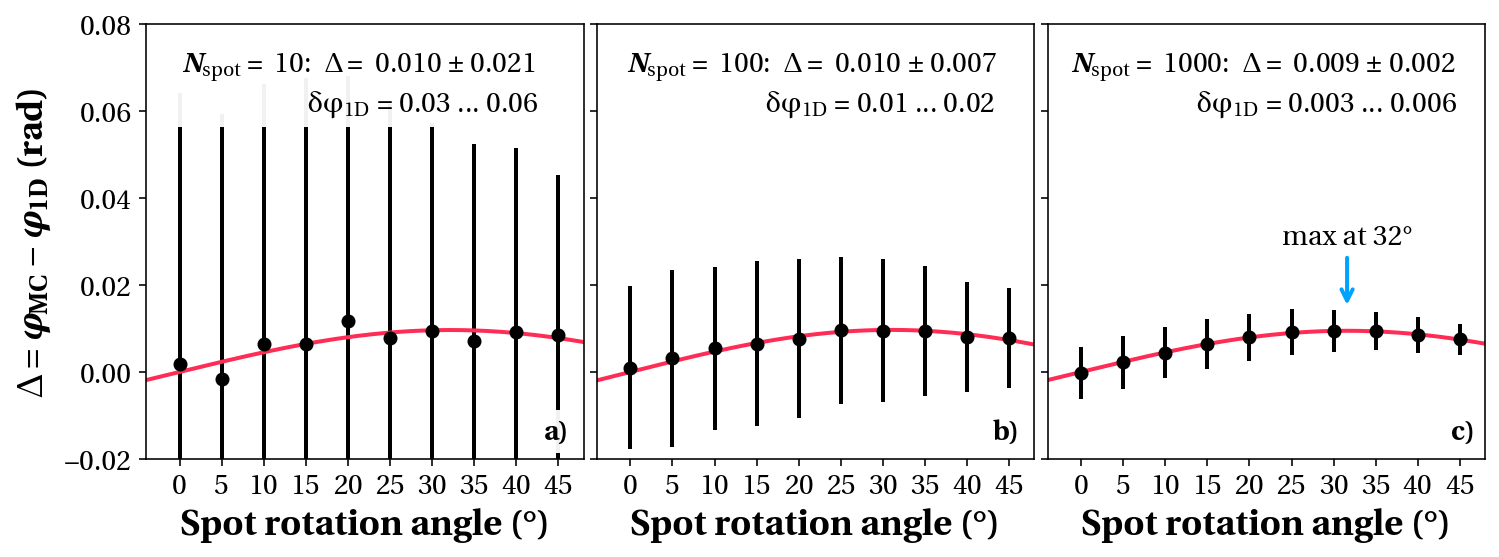

In [7]:
# high-resolution display output
%config InlineBackend.figure_format ='retina'

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from iminuit.cost import LeastSquares

# Utopia LaTeX font with greek letters
mpl.rc('font', family='serif', serif='Linguistics Pro')
mpl.rc('text', usetex=False)
mpl.rc('mathtext', fontset='custom',
       rm='Linguistics Pro',
       it='Linguistics Pro:italic:bold',
       bf='Linguistics Pro:bold')

col = ['#FFCC00', '#FF2D55', '#00A2FF', '#61D935', 'k', 'grey', 'pink'] # yellow, red, blue, green

df_angle_analysis = pd.read_csv('MC-repeated-angles0--45.csv')

df_angle_analysis['absolut_deviation_rad'] = df_angle_analysis.mc - df_angle_analysis.phi1D
df_angle_analysis['relative_deviation_std'] = np.abs(df_angle_analysis.mc - df_angle_analysis.phi1D)/df_angle_analysis.phi1D_unc

def sin(x, α, β):
    return(α*np.sin(x*np.pi/2/β))

# Plot data and sin-fit
fig, axs = plt.subplots(1,3,figsize=(12,4), sharey='row', gridspec_kw={'wspace': 0.03})

fit_x = np.linspace(-4,48,1000)
ns = [10,100,1000]
text_pos = [0.145,0.403,0.66]
unc_1D = ['                    δφ$_{\\rm{1D}}$ = 0.03 ... 0.06',
          '                      δφ$_{\\rm{1D}}$ = 0.01 ... 0.02',
          '                    δφ$_{\\rm{1D}}$ = 0.003 ... 0.006']

for n in range(len(ns)):
    data_x = df_angle_analysis[df_angle_analysis.n_data == ns[n]].angle.to_numpy()
    data_y = df_angle_analysis[df_angle_analysis.n_data == ns[n]].absolut_deviation_rad.to_numpy()
    data_yerr = df_angle_analysis[df_angle_analysis.n_data == ns[n]].phi1D_std.to_numpy()

    least_squares = LeastSquares(data_x, data_y, data_yerr, sin)
    m = Minuit(least_squares, α=0.1, β=30)  # starting values for α and β
    m.migrad()  # finds minimum of least_squares function
    m.hesse()   # accurately computes uncertainties
    print(m.values['β'])
    fig.text(text_pos[n],0.73,'$N_{{\\rm{{spot}}}}=$ {:.0f}:  $\Delta=$ {:.3f} $\pm$ {:.3f}\n{}'.format(ns[n], m.values['α'], m.errors['α'], unc_1D[n]), fontsize=14, bbox=dict(facecolor='white', alpha=0.95,linewidth=0))

    axs[n].errorbar(data_x, data_y, data_yerr, fmt='o', c='k', label='Rel. deviation', lw=2)
    axs[n].plot(fit_x, sin(fit_x, *m.values), c=col[1], label='Sinus fit',lw=2)
    if n==2:
        axs[n].annotate('max at 32°', xy=(m.values['β'], m.values['α']+0.005), xytext=(m.values['β'], m.values['α']+0.02),
                 arrowprops=dict(facecolor=col[2], arrowstyle='->', lw=2, color=col[2]),fontsize=14, horizontalalignment='center')

for i in axs:
    i.tick_params(labelsize=14)
    i.set_xlabel('Spot rotation angle (°)',fontsize=18,fontweight='bold')
    i.set_xlim(-4,48)
    i.set_ylim(-0.02,0.08)
    i.set_xticks([0,5,10,15,20,25,30,35,40,45])

fig.text(0.06, 0.5, '$\\Delta = \\varphi_{\\bf{MC}}-\\varphi_{\\bf{1D}}$ (rad)', va='center', ha='center', rotation='vertical',fontsize=18,fontweight='bold')

fig.text(0.355,0.16,'a)', fontsize=14,fontweight='bold', bbox=dict(facecolor='white', alpha=0.95,linewidth=0))
fig.text(0.615,0.16,'b)', fontsize=14,fontweight='bold', bbox=dict(facecolor='white', alpha=0.95,linewidth=0))
fig.text(0.88,0.16,'c)', fontsize=14,fontweight='bold', bbox=dict(facecolor='white', alpha=0.95,linewidth=0))

plt.savefig('absolut-deviation-1Dfit.pdf', bbox_inches='tight',pad_inches=0.1)
plt.show()

# Resulting frequency shift for strongly deformed and asymmetric peaks

Estimation for a signly charged ion of mass m~100u in a 6 T magnetic field. The resulting cyclotron frequency is on the order of ~ 1 MHz.

In [5]:
import numpy as np

phi_shift = 0.01
t_acc = np.array([0.1,1.0]) # given in s: 100 ms and 1000 ms
freq = 1000000 # frequency in Hz: nu_c = 1MHz
phi_total = 2*np.pi * t_acc * freq
print('Frequency shift:',phi_shift/phi_total*freq,'Hz')
print('Relative shift:',phi_shift/phi_total)

Frequency shift: [0.01591549 0.00159155] Hz
Relative shift: [1.59154943e-08 1.59154943e-09]
